In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [77]:
sns.set(rc = {'figure.figsize':(11.7, 8.27)})
cars_data = pd.read_csv("/content/cars_sampled.csv")

print("shape:", cars_data.shape)
#making copy
cars = cars_data.copy()
#summarizing data such that we get rounded values upto 3 decimal places.
pd.set_option('display.float_format', lambda x: '%.3f' %x)
#we want to see all columns at once so setting the maximum limit at 500
pd.set_option('display.max_columns', 500)

shape: (50001, 19)


In [78]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

There are only 6 rows with "int" values

In [79]:
print(cars.shape)
cars.describe()

(50001, 19)


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


**Observations**

1) all 50001 rows have non null values in all 6 columns.
2) The huge difference between mean and median shows that the distribution of price is skewed. 3) the mean value of yearOfRegistration is 2005 which again does not make sense because we cannot calculate the mean value for year, also it has to be int not float, however median does make sense and also the minimum year value is 1000 which also does not make sense 4) also the powerPs minimum value is 0 which also does not make sense 5) minimum value for monthOfRegistration is 0 which also does not make sense 6) postalCode we dont need so we will be removing this column

dropping unwanted columns, she just said we wont be using these variables for our analysis.

In [80]:
col = ["name", "dateCrawled", "dateCreated", "postalCode", "lastSeen"]
cars = cars.drop(columns = col, axis =1)

In [81]:
cars.shape

(50001, 14)

In [82]:
#start from 10:0

In [83]:
cars.isnull().sum()

,0
seller,0
offerType,0
price,0
abtest,0
vehicleType,5188
yearOfRegistration,0
gearbox,2824
powerPS,0
model,2758
kilometer,0


# step 1:
# setting the working range.

In [84]:
yearwise_counts = cars['yearOfRegistration'].value_counts().sort_index()

In [85]:
print(yearwise_counts)

yearOfRegistration
1000     6
1255     1
1500     2
1910    15
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: count, Length: 97, dtype: int64


so by calculating the num ber of resgistration per year we can see that there are many years that are very old or are in future such as 1000,1255,1500 and 7500,7800,8500.

So for these we will have to clean the data.

In [86]:
print(sum(cars['yearOfRegistration']>2018))
print(sum(cars['yearOfRegistration']<1950))
print(sum(cars['yearOfRegistration']>1950))

26
39
49958


so there are very few values that are out of range.

# so we are setting the working range for year of registration as between 1950 to 2018.

<Axes: xlabel='yearOfRegistration', ylabel='price'>

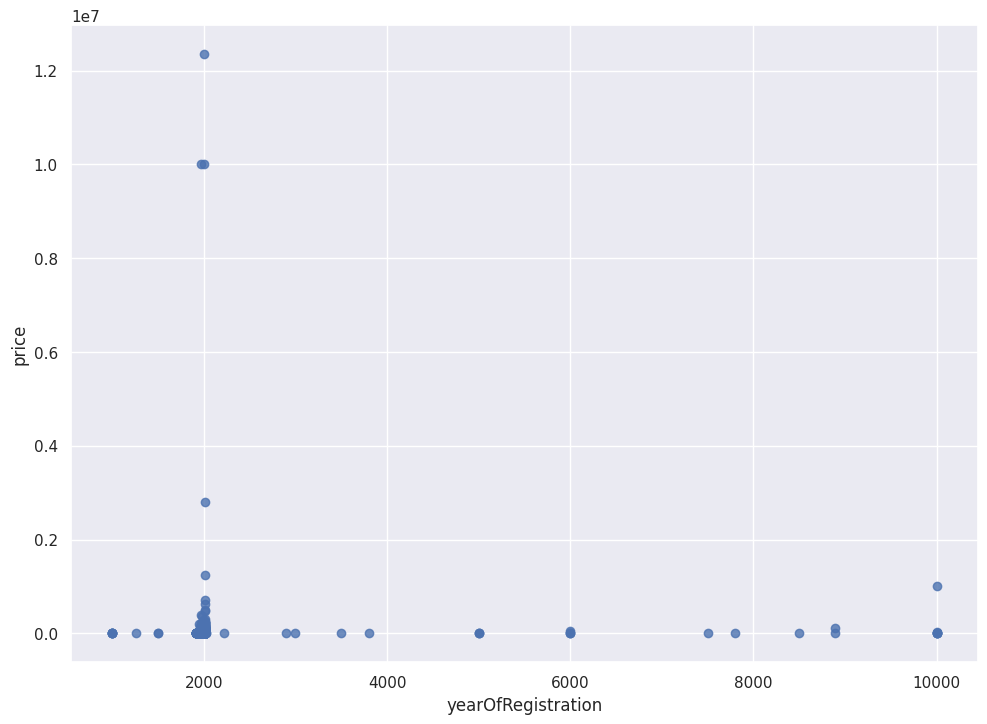

In [87]:
sns.regplot(x= 'yearOfRegistration', y ='price', scatter = True, fit_reg=False, data=cars)

In [88]:
price_count = cars['price'].value_counts().sort_index()
print(price_count)

price
0           1451
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: count, Length: 2393, dtype: int64


there are many that have price as zero, so we would have to clean them as well.


<ipython-input-89-1b365431d8de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])


<Axes: xlabel='price', ylabel='Density'>

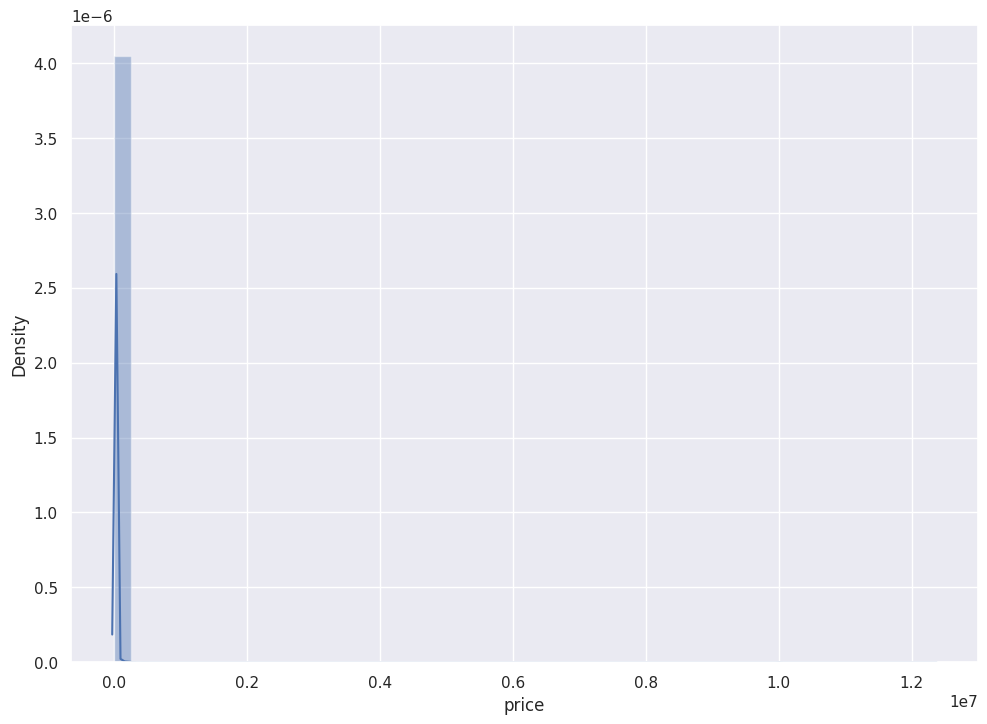

In [89]:
sns.distplot(cars['price'])

there are lot of entries under zero price category, so we will have to clean data accordingly.

In [90]:
cars['price'].describe()

,price
count,50001.000
mean,6559.865
std,85818.470
min,0.000
25%,1150.000
50%,2950.000
75%,7190.000
max,12345678.000


the mean and median values are far apart showing that the sitribution is skewed.

<Axes: ylabel='price'>

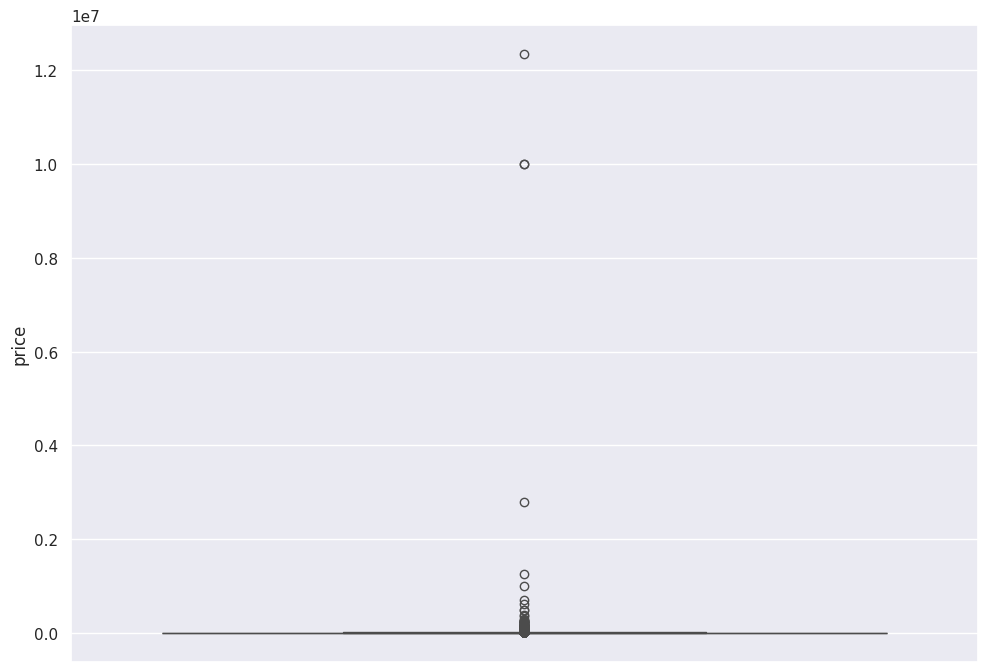

In [91]:
sns.boxplot(y=cars['price'])

in the box plot we are not even able to see the box because the outliers are very large numbers, we will have to strecth the diagram in order to see the box.

In [92]:
print(sum(cars['price'] > 150000)) #the price is in dollars
print(sum(cars['price'] < 100))
print(sum(cars['price'] > 100))

34
1784
48070


we will set the working range as 100 dollars to 150000 dollars.

# the next variable we will look into is powerPS

powerPS
0        5605
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: count, Length: 460, dtype: int64


<ipython-input-93-2551fec15cf0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['powerPS'])


<Axes: xlabel='powerPS', ylabel='Density'>

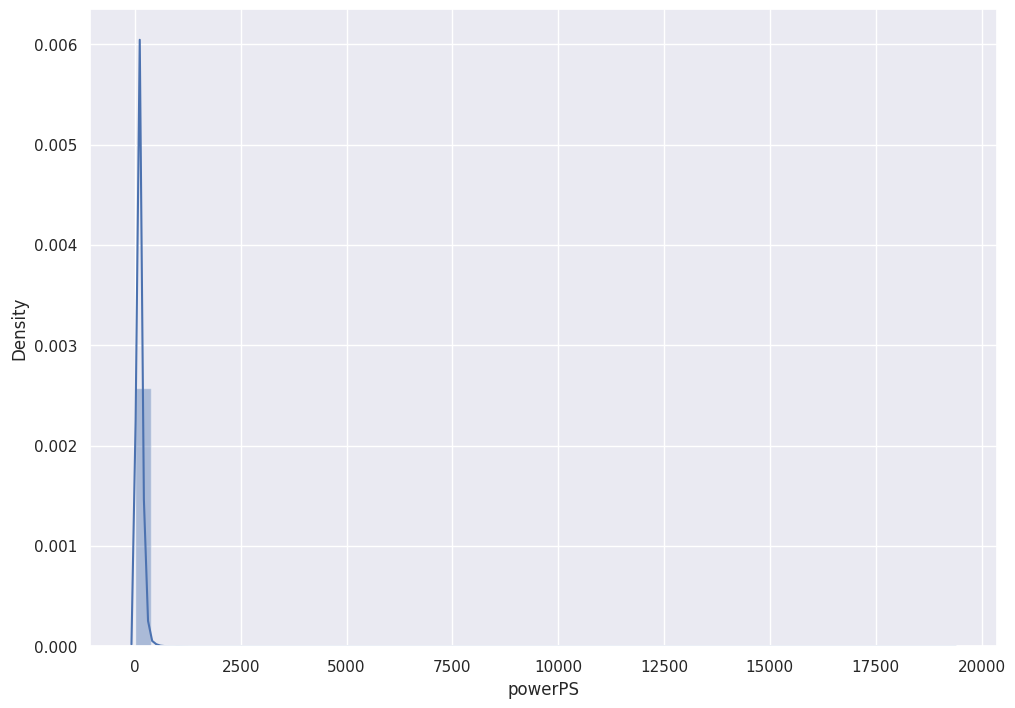

In [93]:
power_count = cars['powerPS'].value_counts().sort_index()
print(power_count)

sns.distplot(cars['powerPS'])

In [94]:
cars['powerPS'].describe()

,powerPS
count,50001.000
mean,116.496
std,230.568
min,0.000
25%,69.000
50%,105.000
75%,150.000
max,19312.000


<Axes: ylabel='powerPS'>

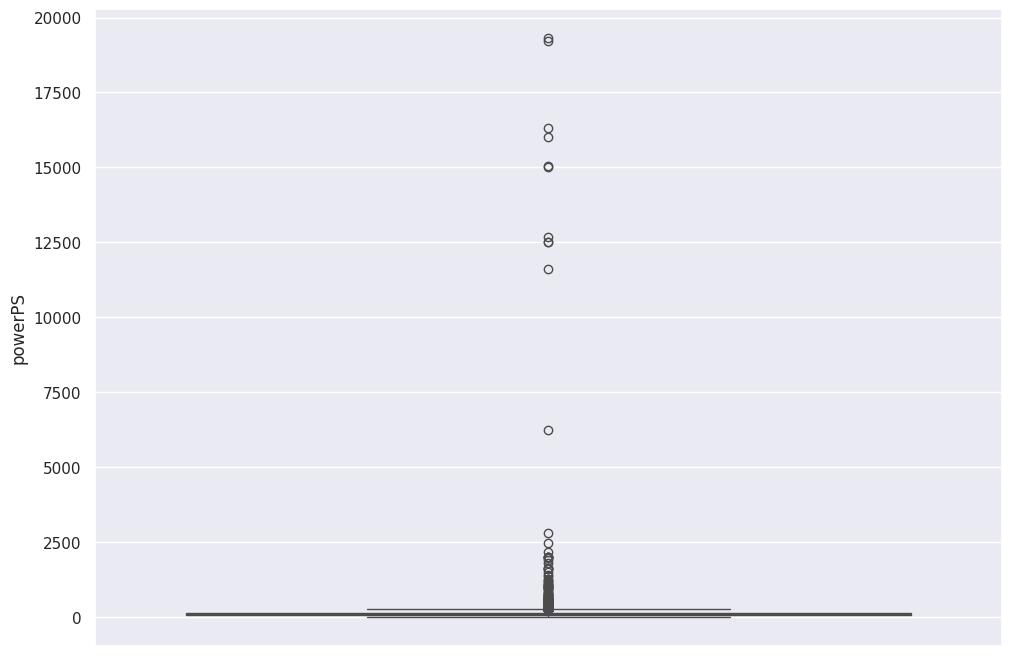

In [95]:
sns.boxplot(y=cars['powerPS'])

<Axes: xlabel='powerPS', ylabel='price'>

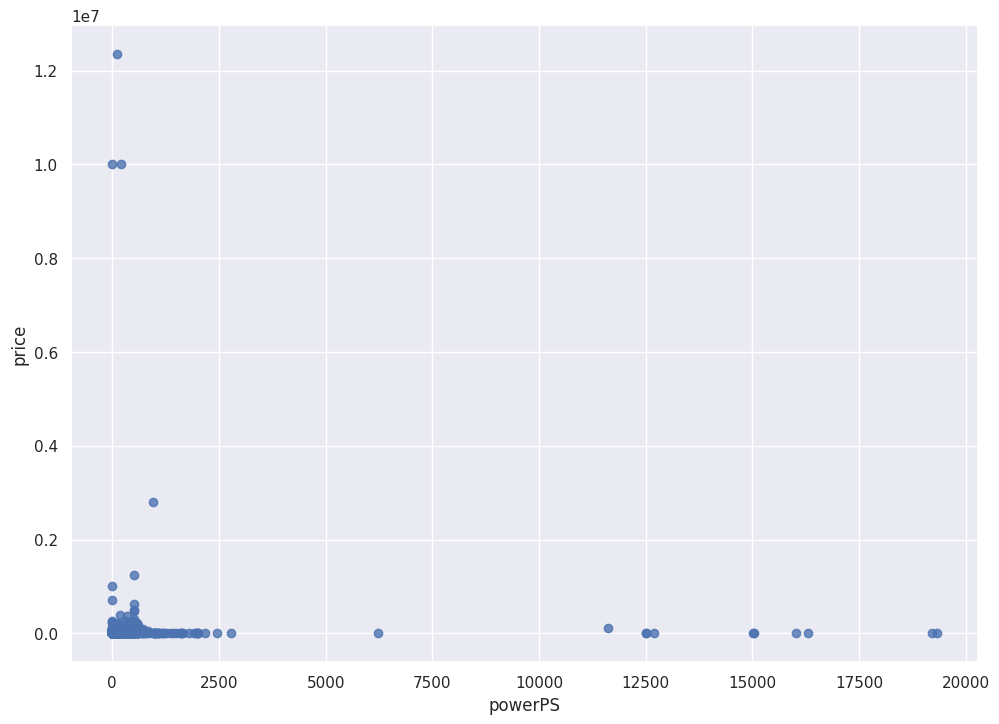

In [96]:
sns.regplot(x="powerPS", y="price", scatter = True, fit_reg = False, data= cars)

In [97]:
print(sum(cars["powerPS"]>500))
print(sum(cars["powerPS"] < 10))
print(sum(cars["powerPS"] > 10))


115
5637
44362


# so we are setting the** working range** for this variable as 10 to 500, we have arrived at this range by 1) trail and error and 2) by selecting values such that we are letting go of too many values.

# but in a company it will come from domain expert's knowledge

so we have the final working range for the three variables
1) year of registration
2) price
3) powerPS

now we will clean the data.


let us fix the working range

In [98]:
cars.shape
cars = cars[(cars.yearOfRegistration <= 2018) & (cars.yearOfRegistration >= 1950) & (cars.price >= 100) & (cars.price <= 150000) & (cars.powerPS >= 10) & (cars.powerPS <= 500) ]

In [99]:
cars.shape

(43155, 14)

**so we are losing 7000 records after fixing the range.**

In [100]:
print(cars.monthOfRegistration)
unique_months = cars['monthOfRegistration'].unique()
print(unique_months)


0         3
1         6
2        11
3        12
4        11
         ..
49991     8
49992     9
49993     8
49995     3
50000    10
Name: monthOfRegistration, Length: 43155, dtype: int64
[ 3  6 11 12  2  4  1  9  0  5 10  8  7]


**there are some month of registration that have month of registration as zero, not explained why. Now, we want to incorporate the month of registration into age, so divide it by 12.**

In [101]:
cars['monthOfRegistration']/=12

<ipython-input-101-7fa0d1678292>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['monthOfRegistration']/=12


# in order to reduce and simplify the features, let us:

# 1) divide the "monthOfRegistration" by 12

# 2) calculate the "age" by subtarcting the "yearofregistration" from 2018, cause we have data till 2018

# 3) add "monthofregistration" and "yearofregistration"

#creating "age" using "month of registration" and "year of registration".

In [102]:
cars['Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']
cars['Age'] = round(cars['Age'], 2)
cars['Age'].describe()

<ipython-input-102-2b8e9f9eba62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Age'] = (2018 - cars['yearOfRegistration']) + cars['monthOfRegistration']
<ipython-input-102-2b8e9f9eba62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Age'] = round(cars['Age'], 2)


,Age
count,43155.000
mean,14.864
std,7.085
min,0.000
25%,10.250
50%,14.830
75%,19.170
max,67.750


age feature is not skewed.

In [103]:
print(cars['Age'])

0       15.250
1       13.500
2       15.920
3       13.000
4       10.920
         ...  
49991   14.670
49992   20.750
49993   19.670
49995   17.250
50000   12.830
Name: Age, Length: 43155, dtype: float64


# now after fixing range of the data, let us check the distribution of age, price and powerPS and see it has improved compared to before fixing range. We are not making inferences just yet, just checking the distribution and see if it is reasonable.

<ipython-input-104-ebd312a8f6a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['Age'])


<Axes: xlabel='Age', ylabel='Density'>

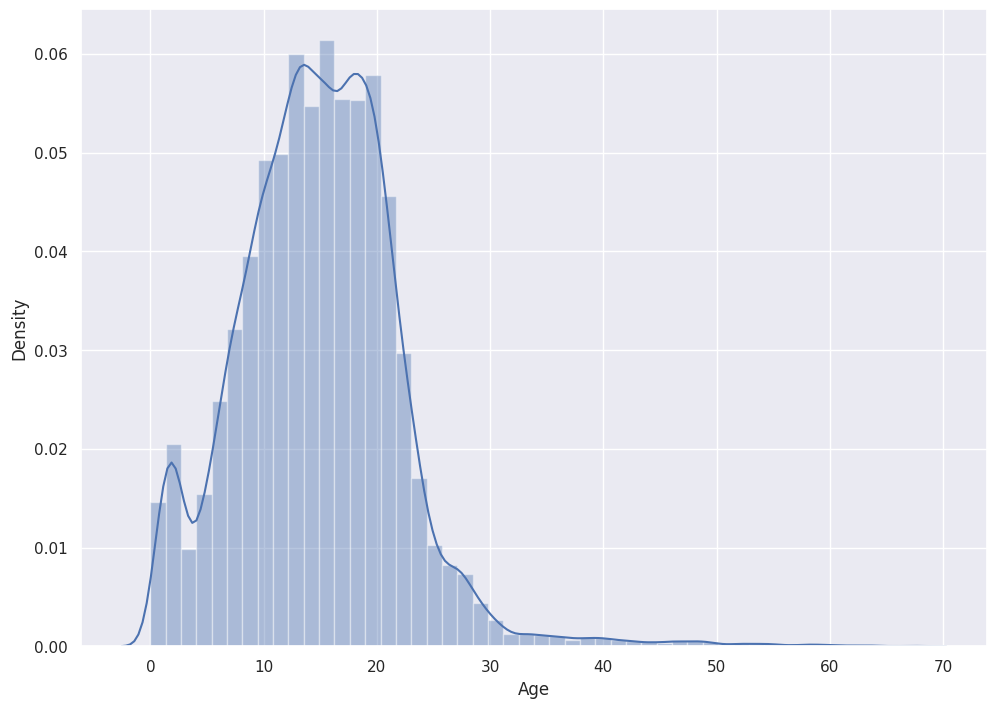

In [104]:
sns.distplot(cars['Age'])

<Axes: ylabel='Age'>

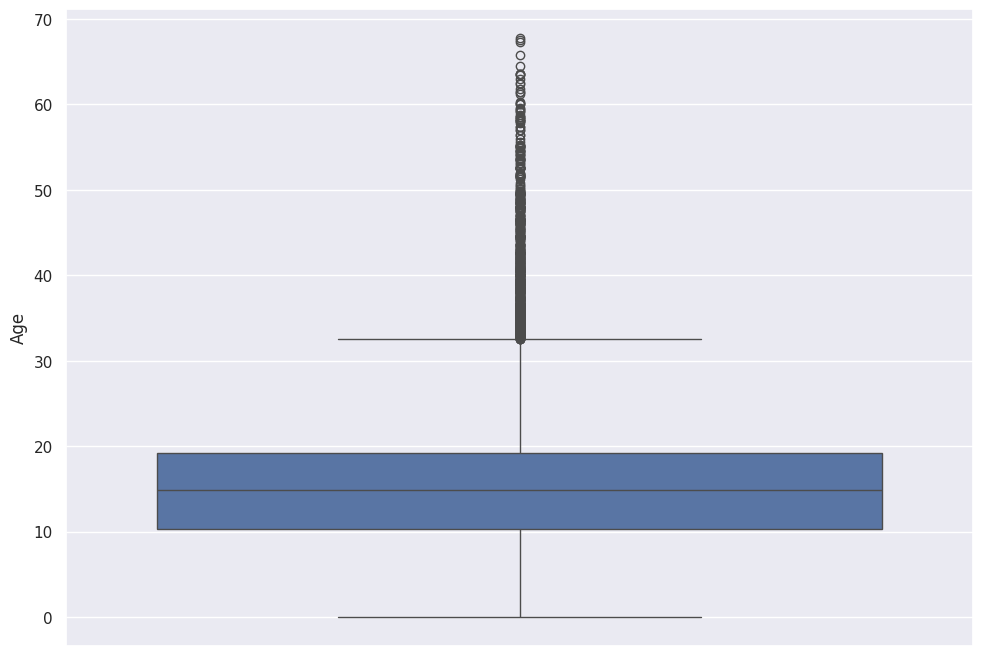

In [105]:
sns.boxplot(cars['Age'])

for price

<ipython-input-106-1b365431d8de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])


<Axes: xlabel='price', ylabel='Density'>

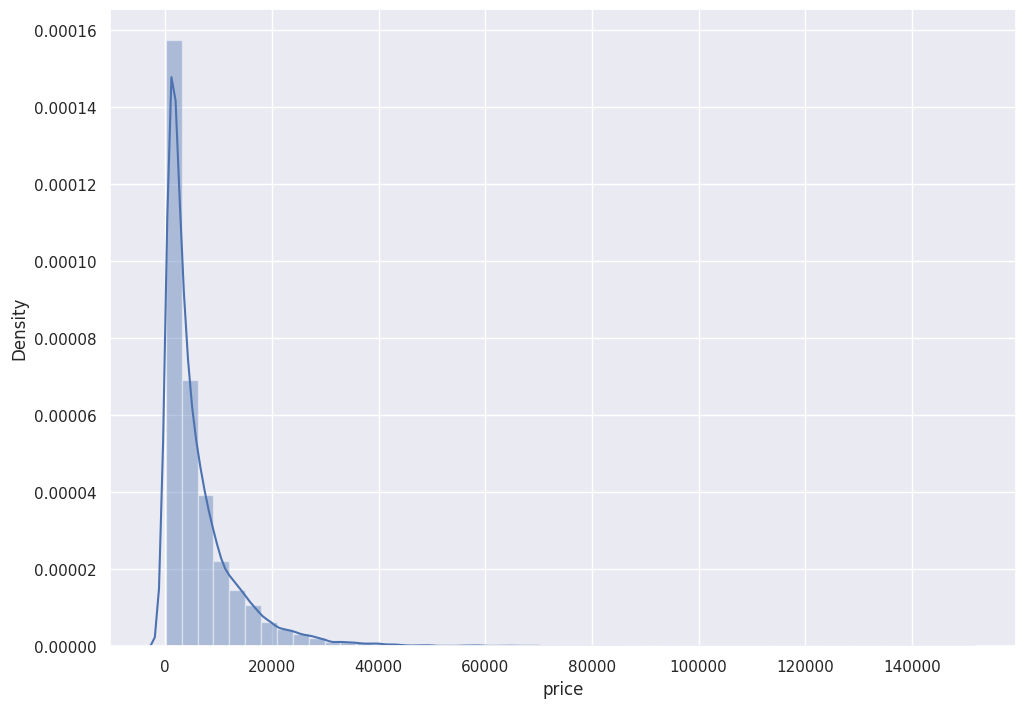

In [106]:
sns.distplot(cars['price'])

<Axes: ylabel='price'>

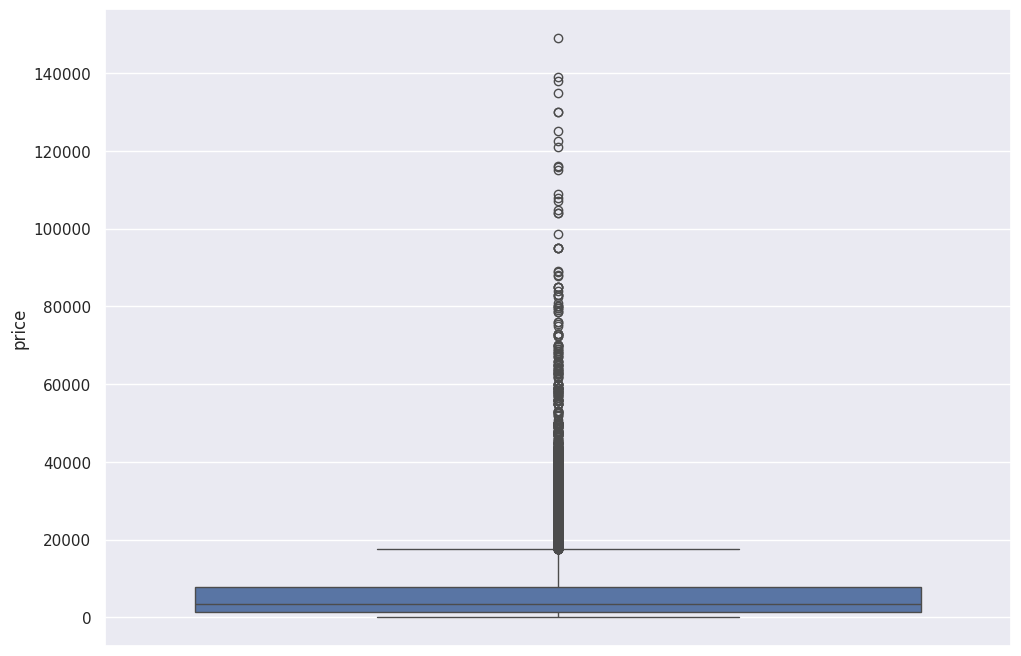

In [107]:
sns.boxplot(cars['price'])

<ipython-input-108-abe7b48fef65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['powerPS'])


<Axes: xlabel='powerPS', ylabel='Density'>

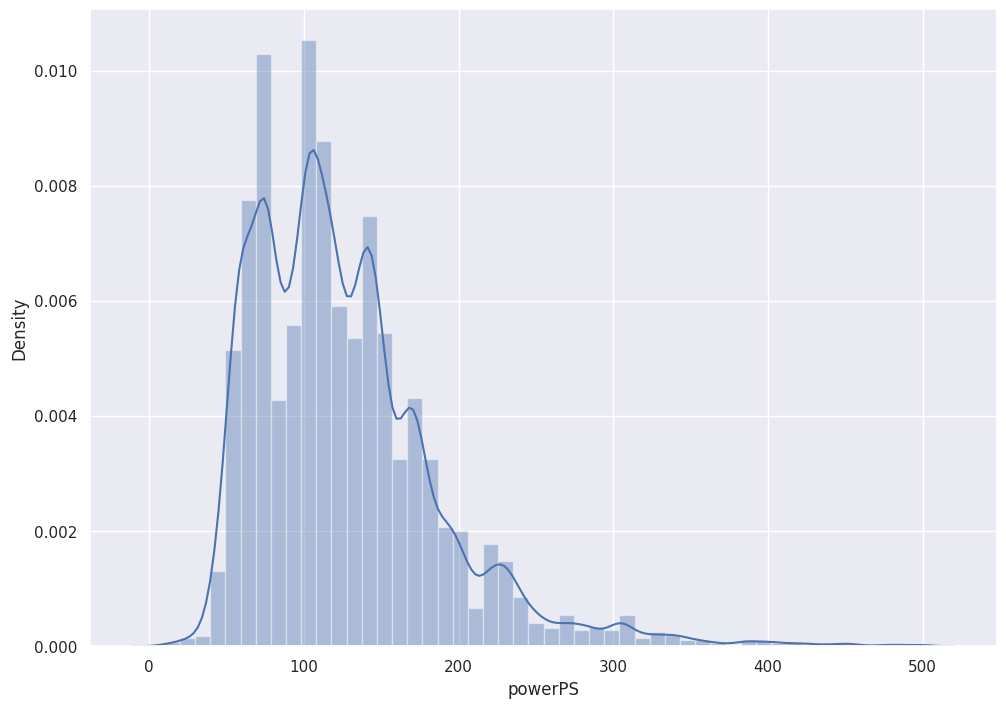

In [108]:
sns.distplot(cars['powerPS'])


<Axes: ylabel='powerPS'>

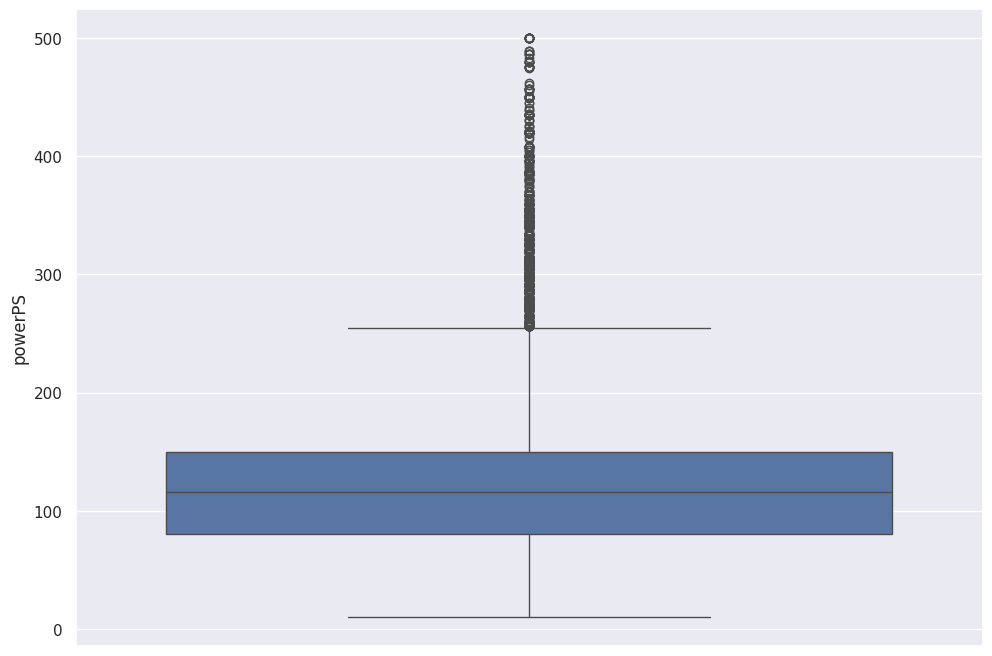

In [109]:
sns.boxplot(cars['powerPS'])

<Axes: xlabel='Age', ylabel='price'>

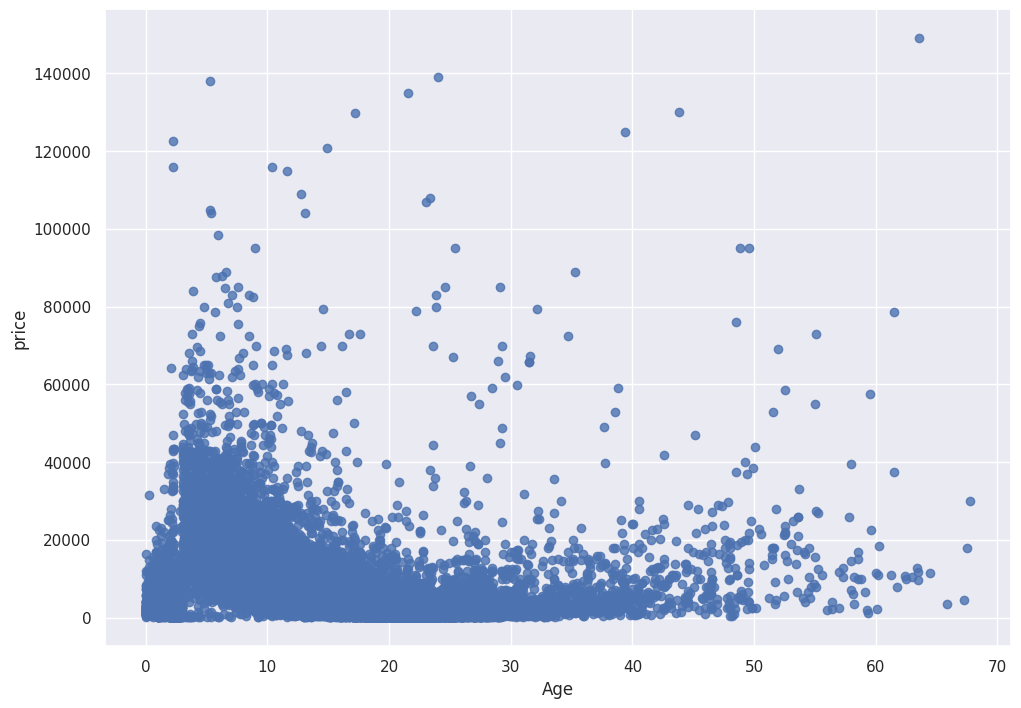

In [110]:
sns.regplot(x= 'Age', y= 'price', scatter = True, fit_reg = False, data= cars )

# the age vs price scatter is now much clearer.

<Axes: xlabel='powerPS', ylabel='price'>

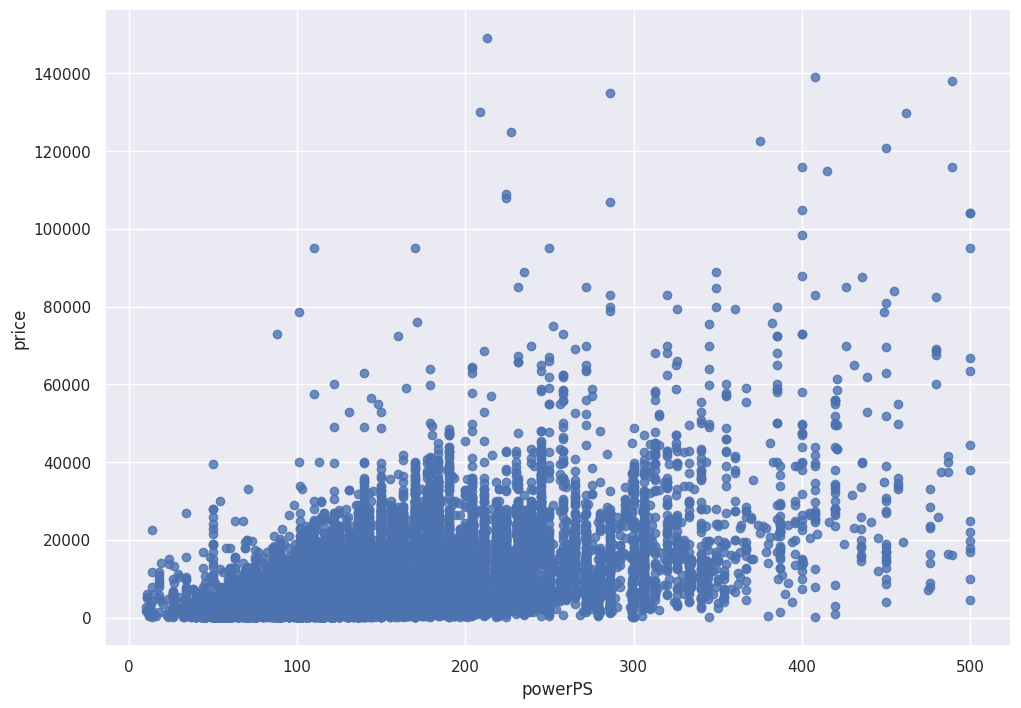

In [111]:
sns.regplot(x= 'powerPS', y= 'price', scatter = True, fit_reg = False, data= cars )

**FROM THIS scatter plot we can see that when powerPS increases price also increases.**

check the count of types of seller

In [112]:
cars['seller'].value_counts()

,count
seller,
private,43154
commercial,1


In [113]:
#this code gives the proportion if seller types, in addition to just count
pd.crosstab(cars['seller'], columns ='count', normalize = True)

col_0,count
seller,
commercial,0.000
private,1.000


**since "seller" is a categotical data type and there is only one type of data in seller, so we mark it as an INSIGNIFICANT variable, and later it will not be used for building the model.**

# check the count of types of offerType

In [114]:
offerType_count = cars['offerType'].unique()
print(offerType_count)


['offer']


there

In [115]:
cars['offerType'].value_counts()

,count
offerType,
offer,43155


earlier we had two "offertype" that is offer and request, now i think after fixing range, we have just "offer".
so we are marking it as an INSIGNIFICANT variable, and later it will
 be used for building the model.

now checking for the variable "abtest", it has two categories that is test and control.

In [116]:
cars['abtest'].value_counts()

,count
abtest,
test,22337
control,20818


In [117]:
#checking proportion
pd.crosstab(cars['abtest'], columns = 'count', normalize = True)

col_0,count
abtest,
control,0.482
test,0.518


so we have equal proportion

<Axes: xlabel='abtest', ylabel='count'>

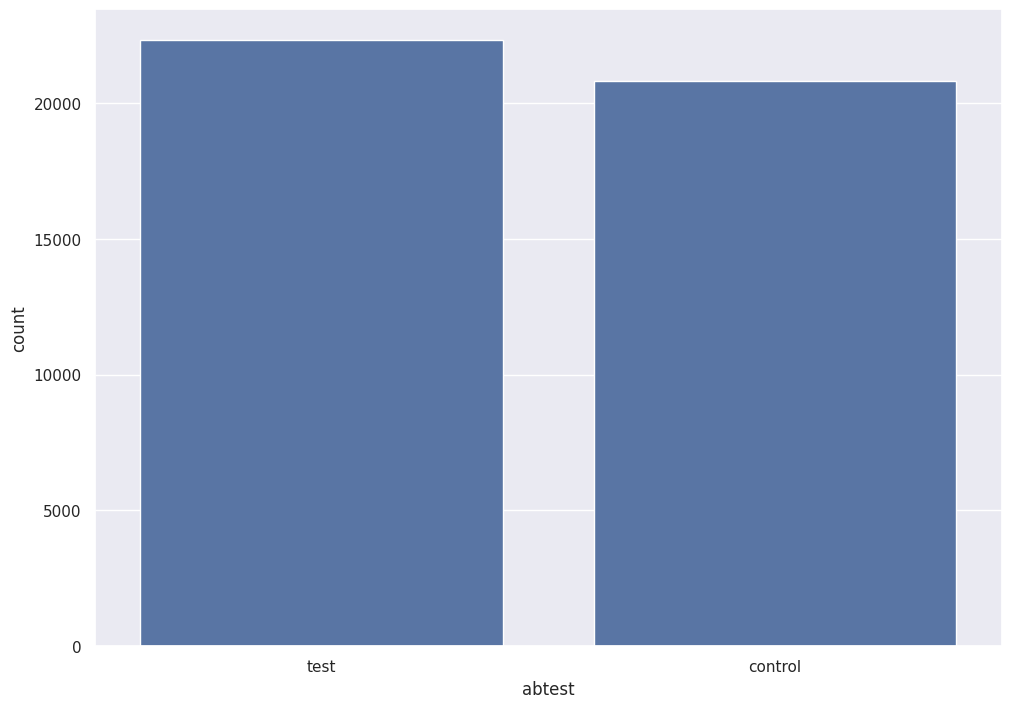

In [118]:
sns.countplot(x='abtest', data=cars)

lets check variation of abtest w.r.t to price

<Axes: xlabel='abtest', ylabel='price'>

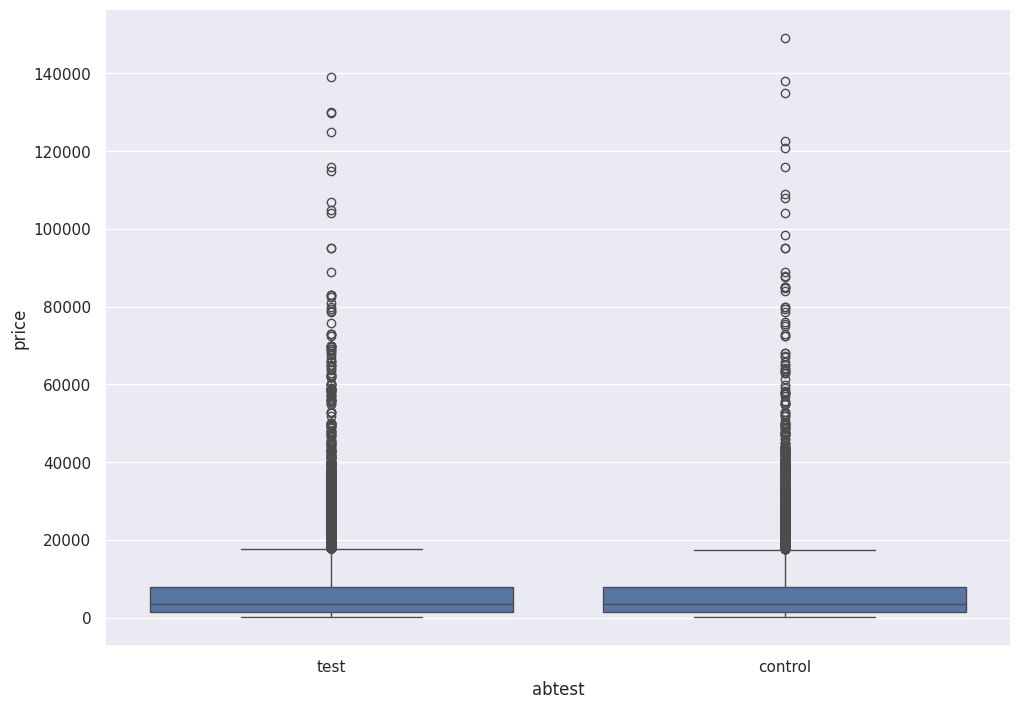

In [119]:
sns.boxplot(x= 'abtest', y = 'price', data = cars)

we can observe that there is no difference between the test/control categories and the price. basically both show similar behaviors w.r.t price hence this is also an insignificant variable.

# checking for vehicle type

In [120]:
cars['vehicleType'].value_counts()

,count
vehicleType,
limousine,11874
small car,9358
station wagon,8155
bus,3624
cabrio,2810
coupe,2276
suv,1847
others,328


In [121]:
pd.crosstab(cars['vehicleType'], columns = 'count', normalize = True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.295
others,0.008
small car,0.232
station wagon,0.202
suv,0.046


<Axes: xlabel='vehicleType', ylabel='count'>

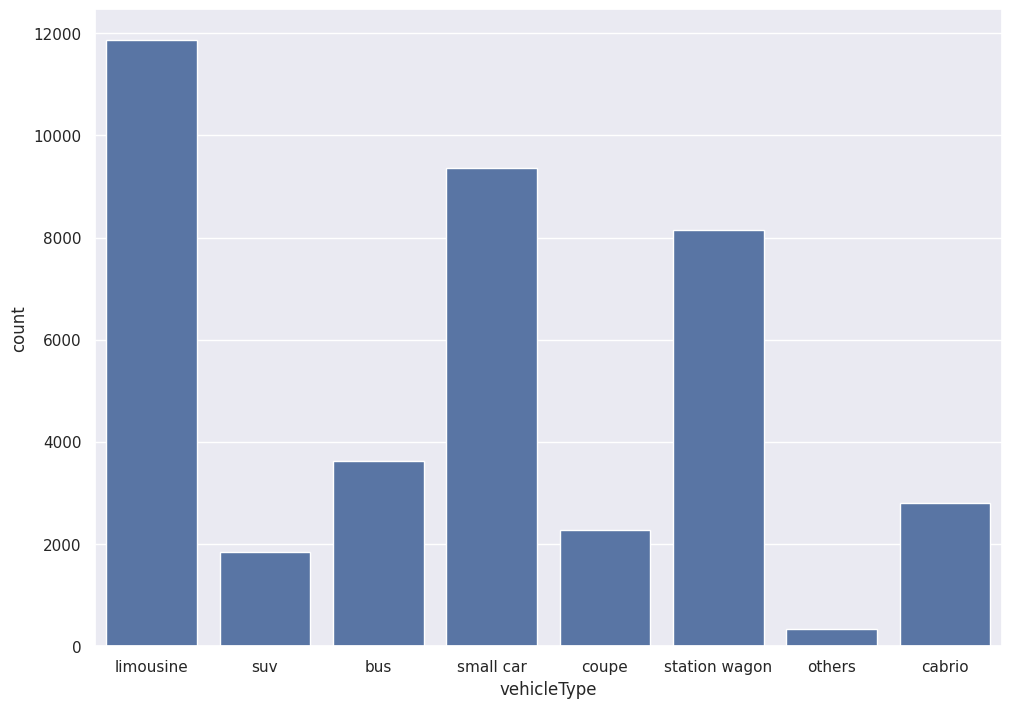

In [122]:
sns.countplot(x= 'vehicleType', data = cars)

<Axes: xlabel='vehicleType', ylabel='price'>

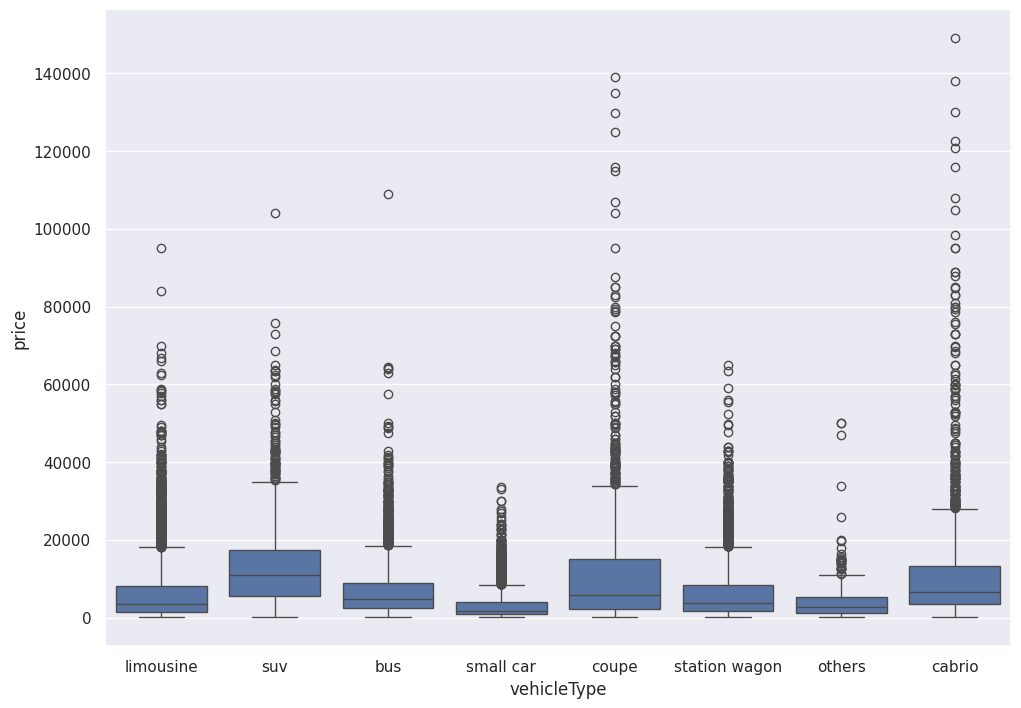

In [123]:
sns.boxplot(x = 'vehicleType', y = 'price', data = cars)

**there is great difference betwen these categories, hence vehicleType is a significant feature.**

# checking for gear box

In [124]:
cars['gearbox'].value_counts()



,count
gearbox,
manual,32847
automatic,9512


In [125]:
pd.crosstab(cars['gearbox'], columns = 'count', normalize = True)


col_0,count
gearbox,
automatic,0.225
manual,0.775


<Axes: xlabel='gearbox', ylabel='count'>

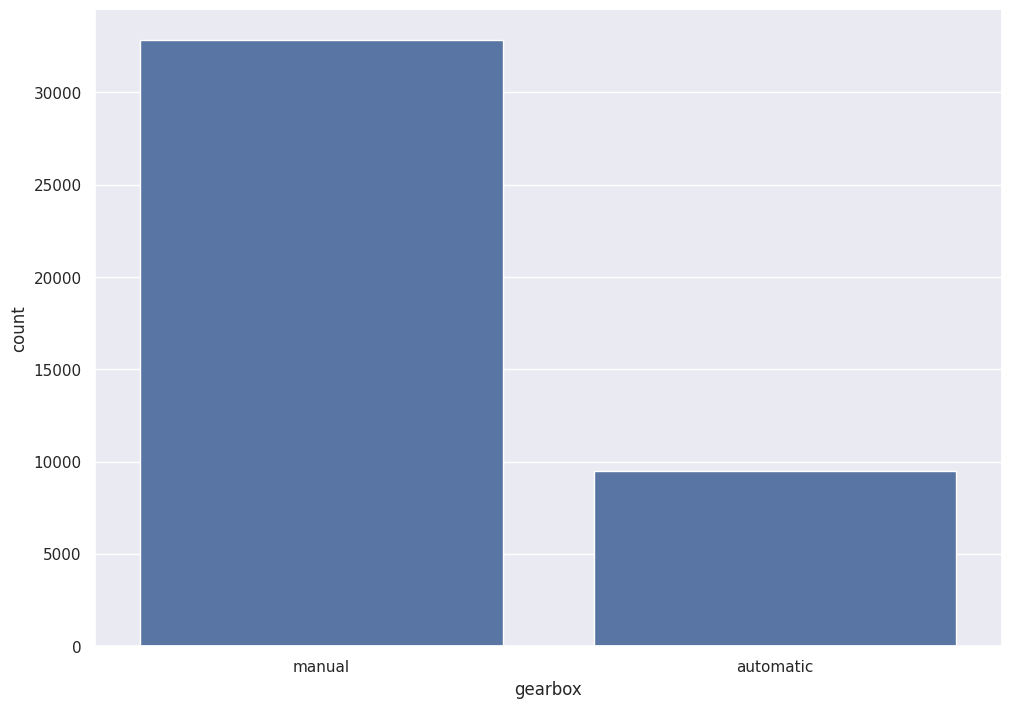

In [126]:
sns.countplot(x= 'gearbox', data = cars)



<Axes: xlabel='gearbox', ylabel='price'>

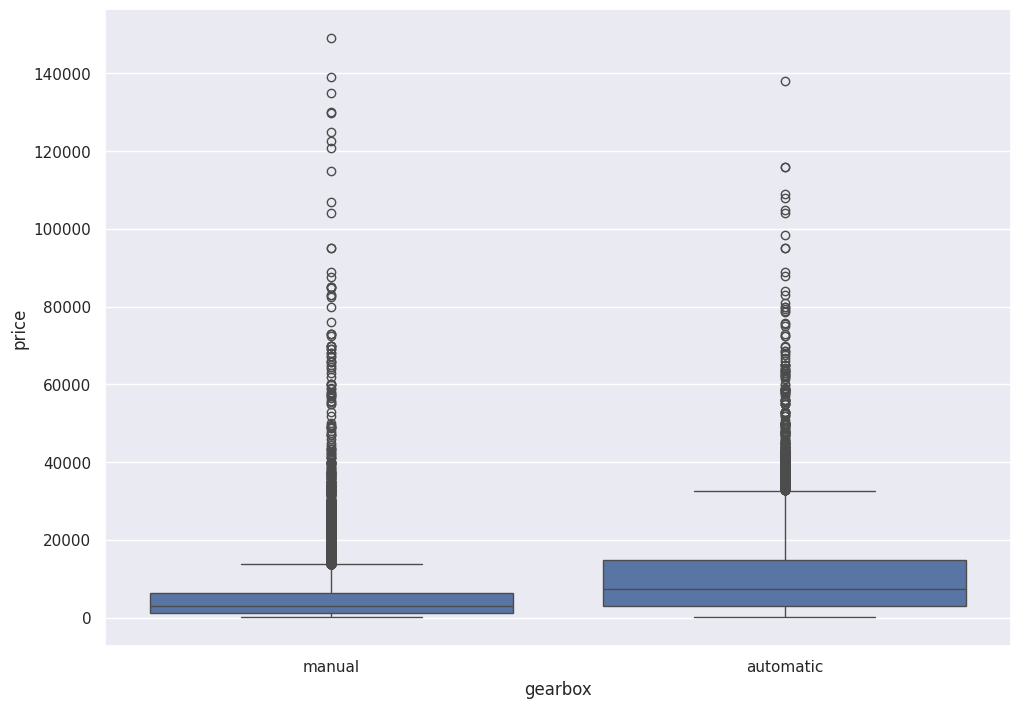

In [127]:
sns.boxplot(x = 'gearbox', y = 'price', data = cars)

# so gearbox is also a SIGNIFICANT variable.

In [128]:
print("1")
print(cars['model'].value_counts())
print("2")
print(pd.crosstab(cars['model'], columns = 'count', normalize = True))


1
model
golf          3513
others        2911
3er           2510
polo          1513
corsa         1402
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: count, Length: 247, dtype: int64
2
col_0    count
model         
100      0.001
145      0.000
147      0.001
156      0.002
159      0.000
...        ...
yaris    0.003
yeti     0.001
ypsilon  0.001
z_reihe  0.003
zafira   0.008

[247 rows x 1 columns]


**golf is the most frequently occuring model.**

<Axes: xlabel='model', ylabel='count'>

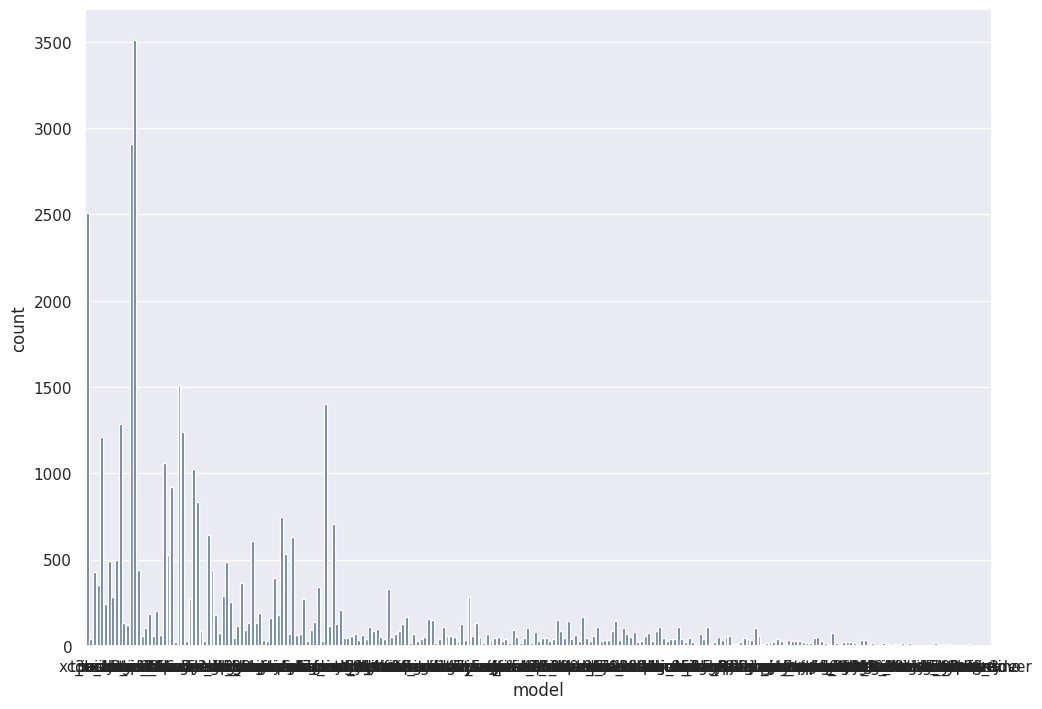

In [129]:

sns.countplot(x= 'model', data = cars)



<Axes: xlabel='model', ylabel='price'>

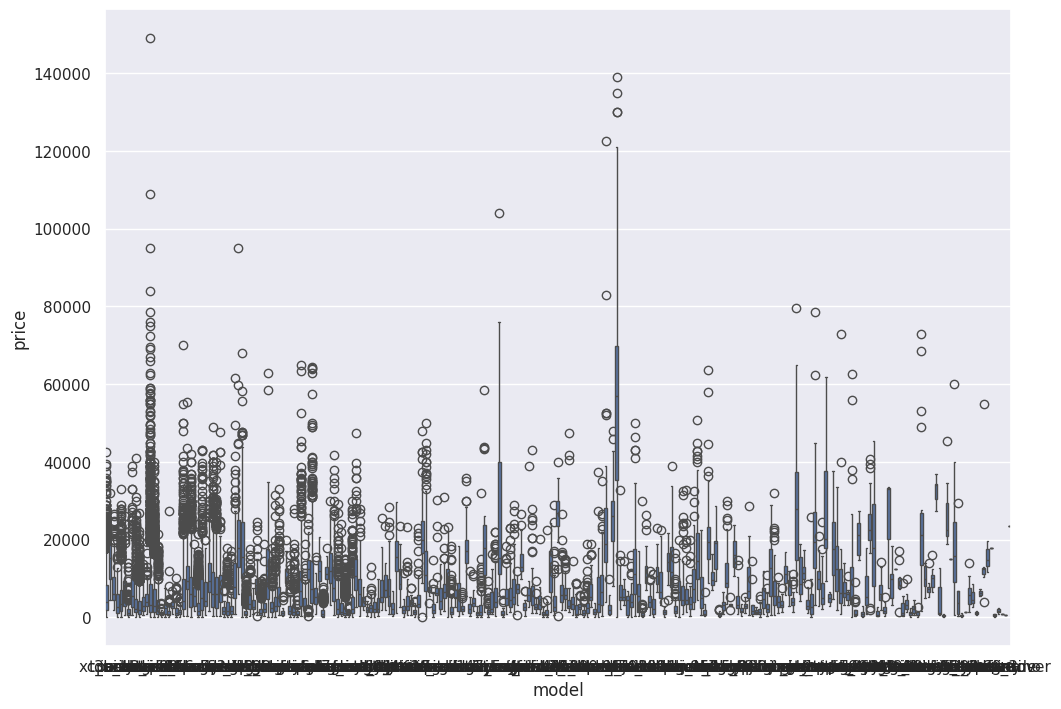

In [130]:
sns.boxplot(x = 'model', y = 'price', data = cars)

# the boxplot does not make any sense, so ignore

# let us check for kilometer

In [131]:
print("1")
print(cars['kilometer'].value_counts())
print("2")
print(pd.crosstab(cars['kilometer'], columns = 'count', normalize = True))

1
kilometer
150000    27649
125000     4635
100000     1851
90000      1496
80000      1395
70000      1190
60000      1126
50000       938
40000       807
30000       725
20000       654
5000        480
10000       209
Name: count, dtype: int64
2
col_0      count
kilometer       
5000       0.011
10000      0.005
20000      0.015
30000      0.017
40000      0.019
50000      0.022
60000      0.026
70000      0.028
80000      0.032
90000      0.035
100000     0.043
125000     0.107
150000     0.641


<Axes: xlabel='kilometer', ylabel='count'>

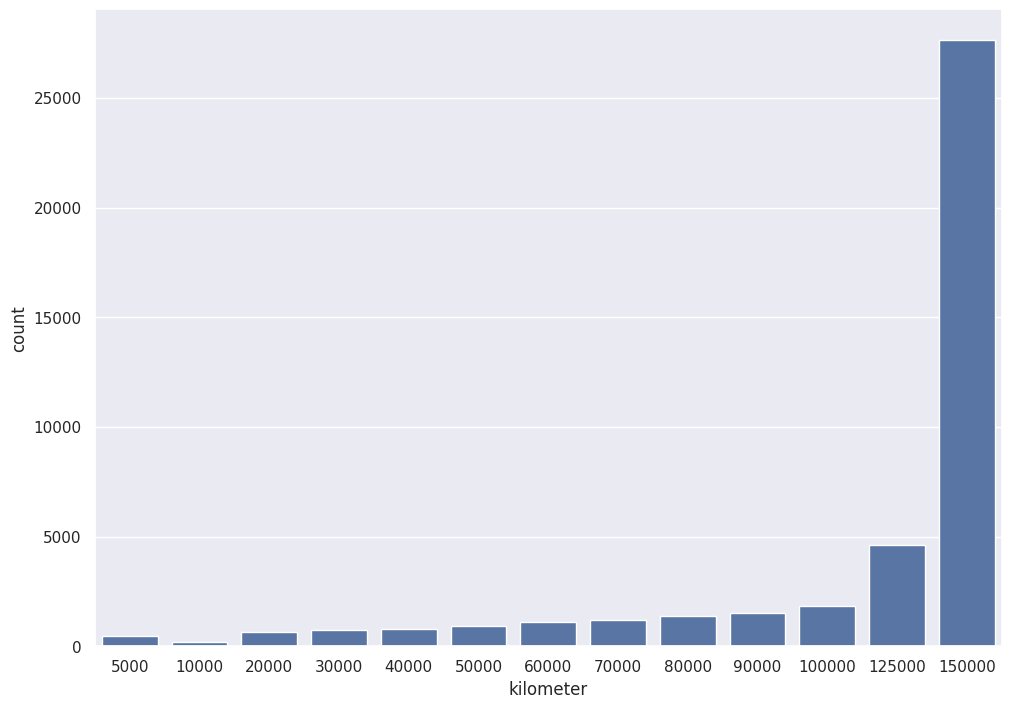

In [132]:

sns.countplot(x= 'kilometer', data = cars)



<Axes: xlabel='kilometer', ylabel='price'>

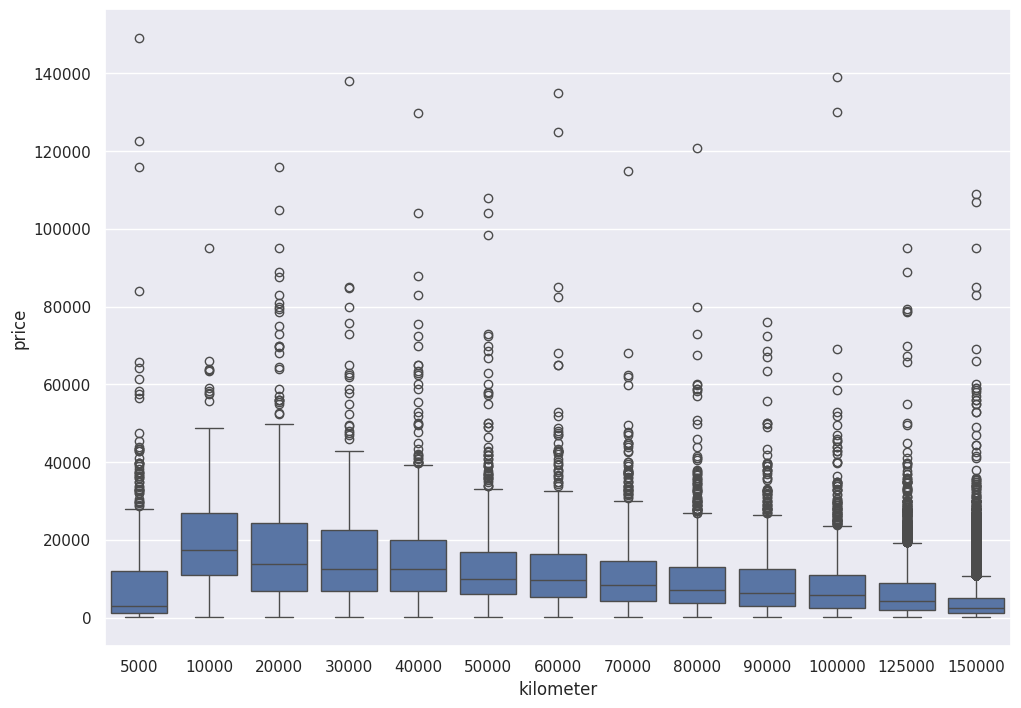

In [133]:
sns.boxplot(x = 'kilometer', y = 'price', data = cars)

with increasing value of "km", there is more wear & tear and the  price drops

In [134]:
cars['kilometer'].describe()

,kilometer
count,43155.000
mean,125765.844
std,39096.688
min,5000.000
25%,100000.000
50%,150000.000
75%,150000.000
max,150000.000


# kilometer is also a significant variable, since there is difference between the categories.

# fueltype

In [135]:
print("1")
print(cars['fuelType'].value_counts())
print("2")
print(pd.crosstab(cars['fuelType'], columns = 'count', normalize = True))

1
fuelType
petrol     26702
diesel     13028
lpg          697
cng           71
hybrid        36
electro       10
other          6
Name: count, dtype: int64
2
col_0     count
fuelType       
cng       0.002
diesel    0.321
electro   0.000
hybrid    0.001
lpg       0.017
other     0.000
petrol    0.658


<Axes: xlabel='fuelType', ylabel='count'>

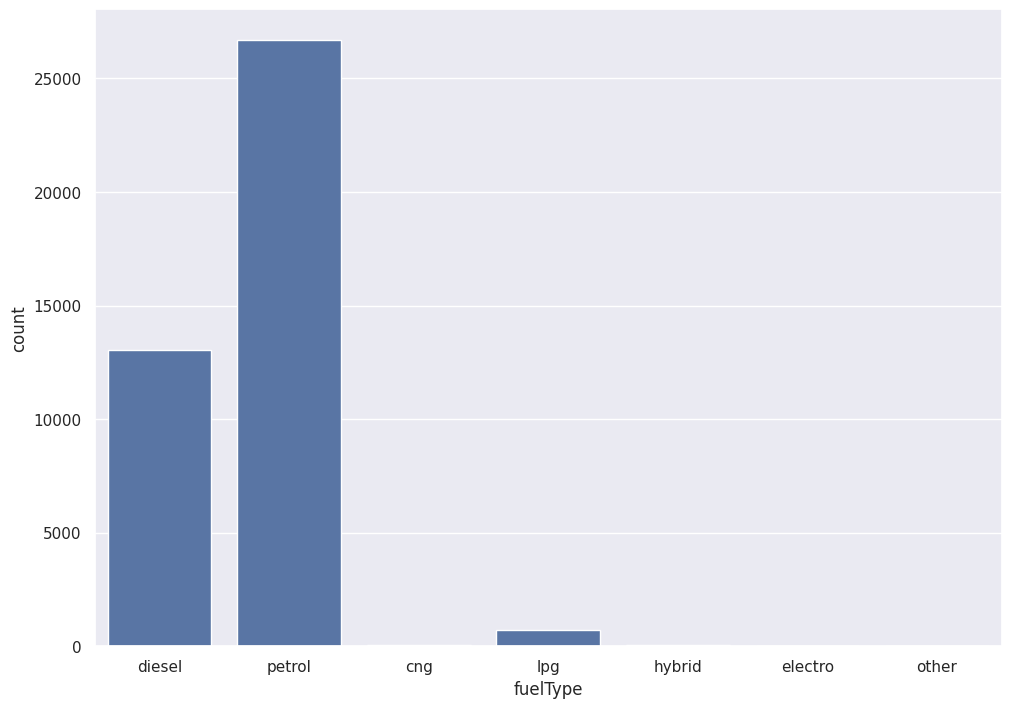

In [136]:
sns.countplot(x= 'fuelType', data = cars)

<Axes: xlabel='fuelType', ylabel='price'>

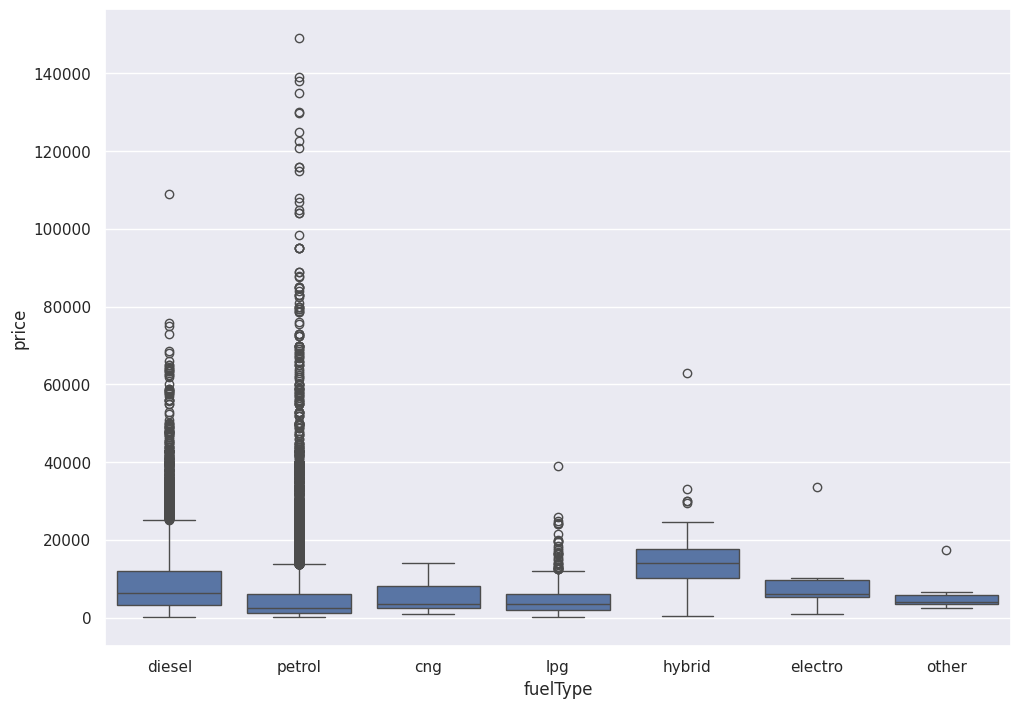

In [137]:
sns.boxplot(x = 'fuelType', y = 'price', data = cars)

so the variable "fueltype" is also SIGNIFICANT becuase, there is variation among its categories and the different fuels have different prices.

# brand

In [138]:
print("1")
print(cars['brand'].value_counts())
print("2")
print(pd.crosstab(cars['brand'], columns = 'count', normalize = True))

1
brand
volkswagen        9229
bmw               4921
opel              4532
mercedes_benz     4182
audi              4025
ford              2840
renault           1954
peugeot           1333
fiat              1001
seat               888
skoda              703
mazda              667
smart              625
nissan             602
citroen            600
toyota             550
volvo              432
mini               429
hyundai            409
mitsubishi         362
sonstige_autos     301
honda              300
kia                279
suzuki             264
porsche            261
alfa_romeo         249
chevrolet          214
chrysler           152
dacia              126
subaru             112
jeep                92
land_rover          81
jaguar              79
daihatsu            67
saab                65
lancia              58
rover               53
daewoo              53
trabant             43
lada                22
Name: count, dtype: int64
2
col_0           count
brand                


so volkswagen accounts for 20% of the total cars


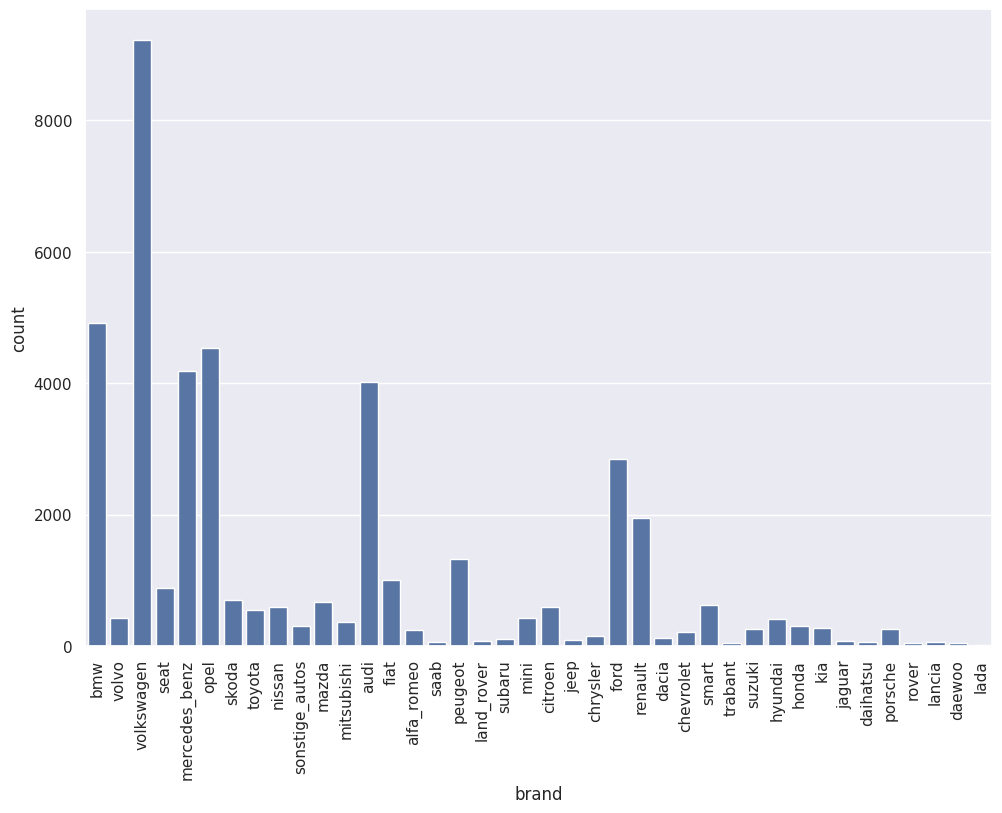

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'cars' with a column 'brand'

sns.countplot(x='brand', data=cars)
plt.xticks(rotation=90)
plt.show()

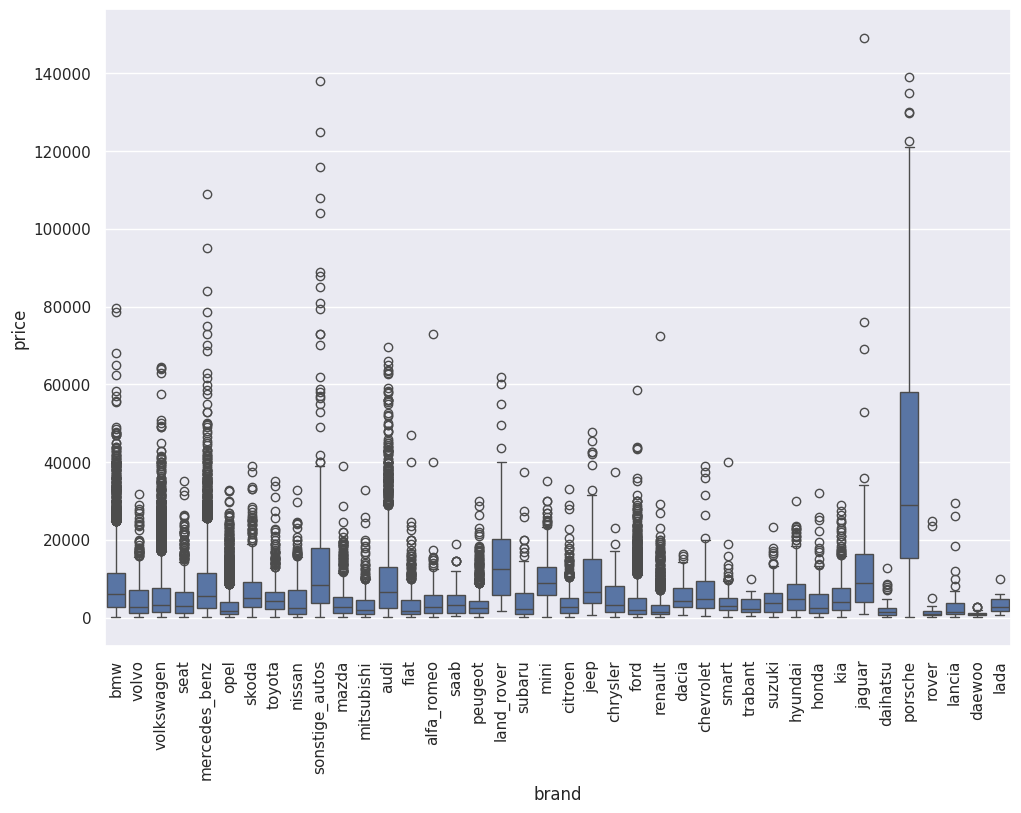

In [140]:
sns.boxplot(x = 'brand', y = 'price', data = cars)
plt.xticks(rotation=90)
plt.show()

this is also a significant variable

# let us look the last variable "notRepairedDamage" variable
#1) Yes = it means that the car is damaged but not rectified
#2) No  = it means that the car is damaged and has been rectified.

In [141]:
print("1")
print(cars['notRepairedDamage'].value_counts())
print("2")
print(pd.crosstab(cars['notRepairedDamage'], columns = 'count', normalize = True))

1
notRepairedDamage
no     32835
yes     4018
Name: count, dtype: int64
2
col_0              count
notRepairedDamage       
no                 0.891
yes                0.109


<Axes: xlabel='notRepairedDamage', ylabel='count'>

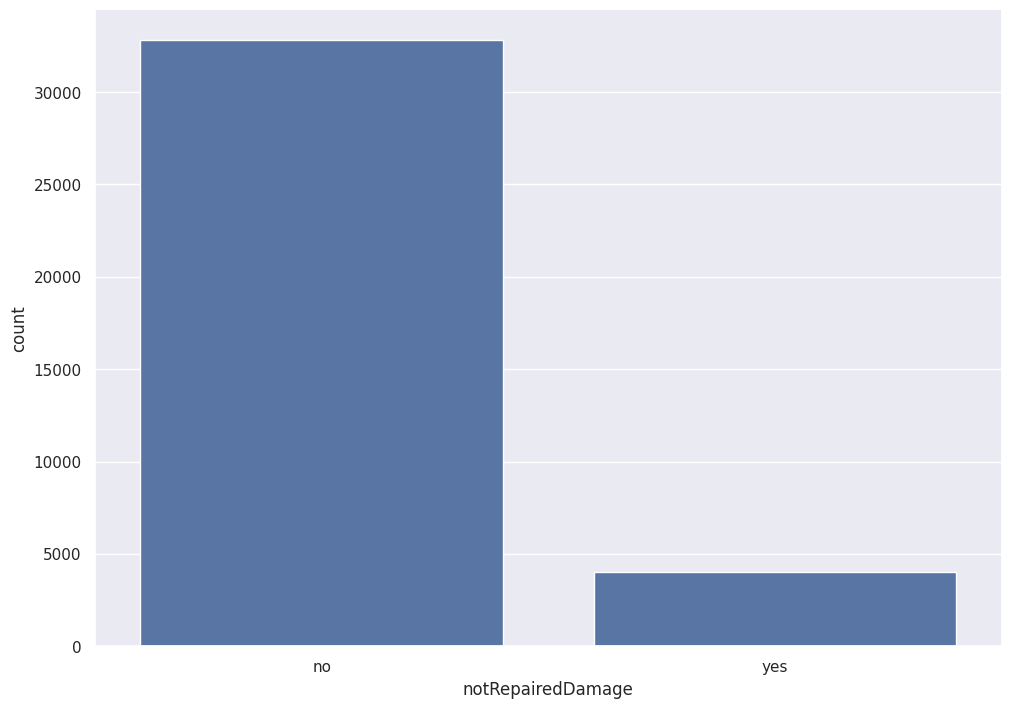

In [142]:

sns.countplot(x='notRepairedDamage', data=cars)

<Axes: xlabel='notRepairedDamage', ylabel='price'>

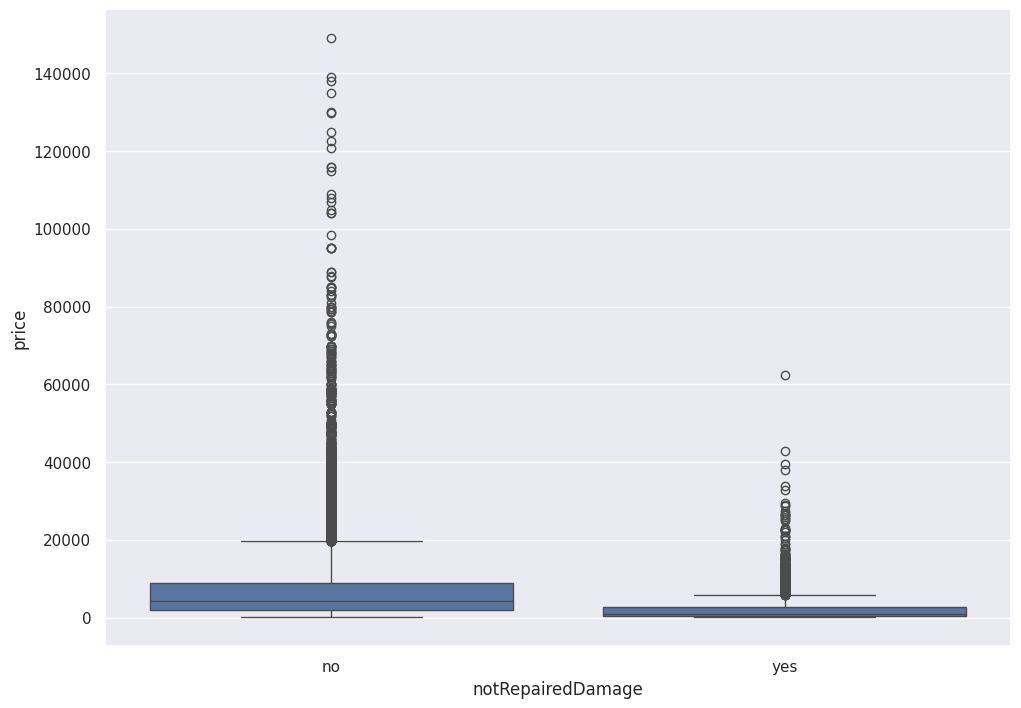

In [143]:
sns.boxplot(x = 'notRepairedDamage', y = 'price', data = cars)

so there is a difference between the "price" , so it is significant
 and hence we wil retain the variable

In [144]:
cars_select1 = cars.select_dtypes(exclude = [object])
correlation = cars_select1.corr()
round(correlation,3)

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,Age
price,1.000,0.339,0.576,-0.440,0.050,-0.337
yearOfRegistration,0.339,1.000,0.155,-0.294,0.023,-0.999
powerPS,0.576,0.155,1.000,-0.018,0.041,-0.153
kilometer,-0.440,-0.294,-0.018,1.000,-0.021,0.293
monthOfRegistration,0.050,0.023,0.041,-0.021,1.000,0.019
Age,-0.337,-0.999,-0.153,0.293,0.019,1.000


# now let us remove insignificant variables

In [145]:
col = ['seller', 'abtest', 'offerType']
cars = cars.drop(columns = col, axis = 1)

In [146]:
#making a copy
cars_copy = cars.copy()

# calculating correlation

In [147]:
cars_select1 = cars.select_dtypes(exclude = [object])
correlation = cars_select1.corr()
round(correlation, 3)

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,Age
price,1.000,0.339,0.576,-0.440,0.050,-0.337
yearOfRegistration,0.339,1.000,0.155,-0.294,0.023,-0.999
powerPS,0.576,0.155,1.000,-0.018,0.041,-0.153
kilometer,-0.440,-0.294,-0.018,1.000,-0.021,0.293
monthOfRegistration,0.050,0.023,0.041,-0.021,1.000,0.019
Age,-0.337,-0.999,-0.153,0.293,0.019,1.000


In [148]:
cars_select1.corr().loc[:,'price']

,price
price,1.000
yearOfRegistration,0.339
powerPS,0.576
kilometer,-0.440
monthOfRegistration,0.050
Age,-0.337


In [149]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending = False)[1:]

,price
powerPS,0.576
kilometer,0.440
yearOfRegistration,0.339
Age,0.337
monthOfRegistration,0.050


**none of the features are strongly correlated to price**

y1 values: 1       9.495
3       8.412
4       9.839
5       6.896
7       7.244
         ... 
49991   9.297
49992   6.672
49993   6.721
49995   7.736
50000   7.003
Name: price, Length: 33227, dtype: float64
(23258, 302) (9969, 302) (23258,) (9969,)
1: 8.246078986825628
2: 1.127432049631379
3: 0.5440507413004994
4: 0.7671383019862261 0.7809367864240399


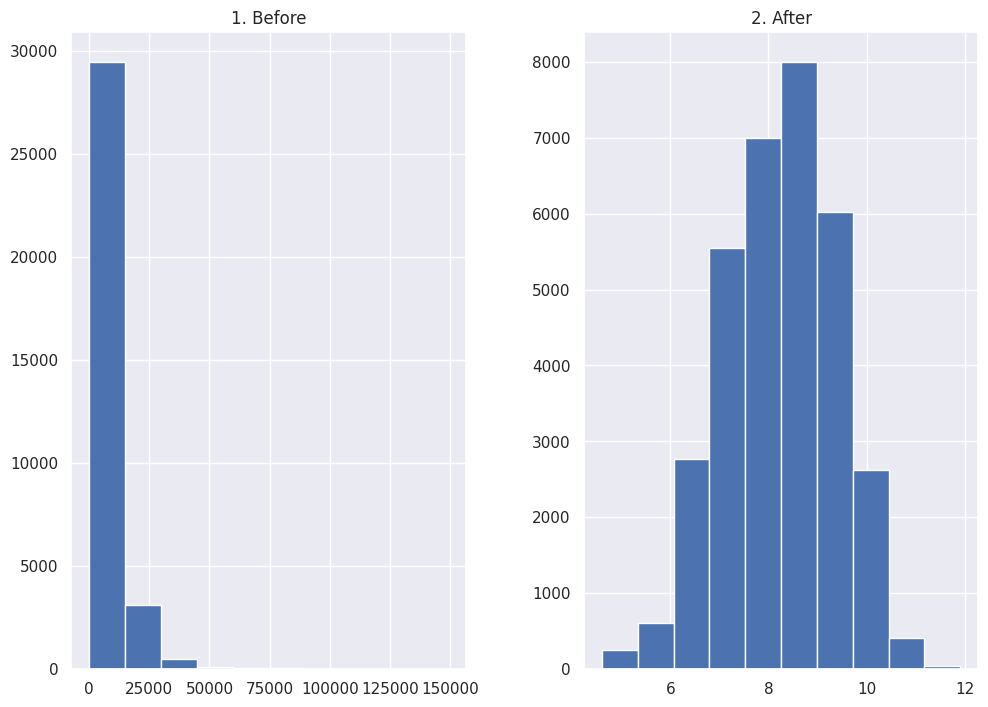

In [157]:
"""
We are going to build a Linear Regression and Random Forest model
on two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values
"""


# =============================================================================
# OMITTING MISSING VALUES
# =============================================================================

cars_omit=cars.dropna(axis=0)

# Converting categorical variables to dummy variables
#one hot encoding
cars_omit=pd.get_dummies(cars_omit,drop_first=True)

# =============================================================================
# IMPORTING NECESSARY LIBRARIES
# =============================================================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# =============================================================================
# MODEL BUILDING WITH OMITTED DATA
# =============================================================================

# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

# Plotting the variable price
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

# Transforming price as a logarithmic value
y1 = np.log(y1)
print("y1 values:", y1)

# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print("shape of train and test data:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# =============================================================================
# BASELINE MODEL FOR OMITTED DATA
# =============================================================================

"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

# finding the mean for test data value
base_pred = np.mean(y_test)
print("1:",base_pred)

# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

# finding the RMSE  using the mean of y_test
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))

print("2:",base_root_mean_square_error)

# =============================================================================
# LINEAR REGRESSION WITH OMITTED DATA
# =============================================================================

# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)

# Model
model_lin1=lgr.fit(X_train,y_train)

# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

# Computing MSE and RMSE for Linear regression predictions
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print("3:",lin_rmse1)

# R squared value for both train and test !
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print("4:",r2_lin_test1,r2_lin_train1)



,price
count,9969.000
mean,0.016
std,0.544
min,-5.621
25%,-0.246
50%,0.048
75%,0.292
max,4.816


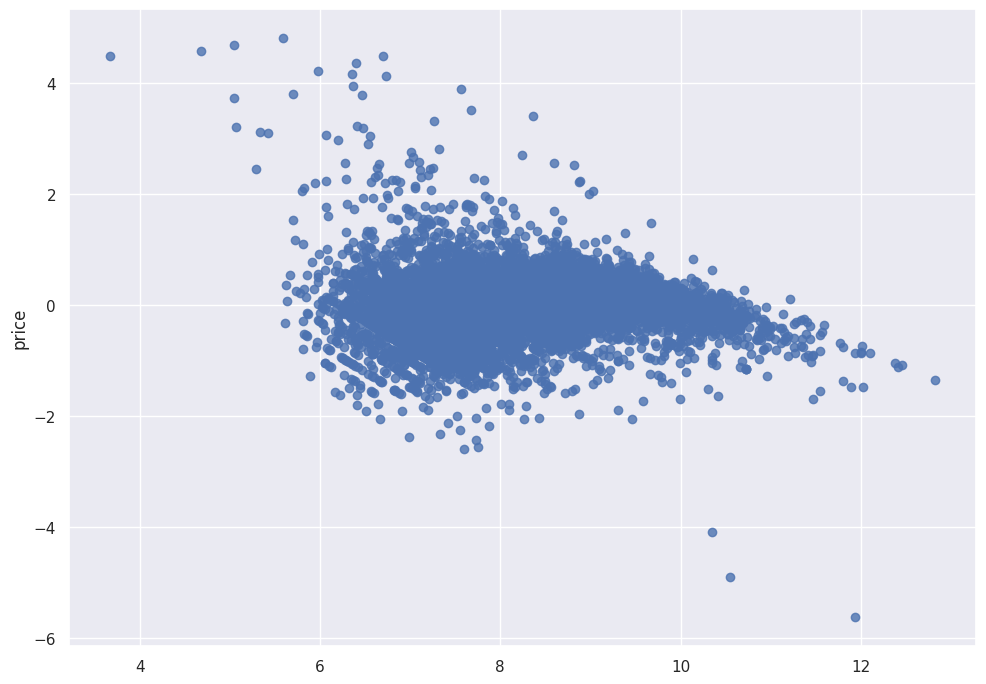

In [155]:

#residue vs predictions plot
# Regression diagnostics- Residual plot analysis
residuals1=y_test - cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True,
            fit_reg=False)
residuals1.describe()

In [159]:
# =============================================================================
# RANDOM FOREST WITH OMITTED DATA
# =============================================================================

# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='sqrt',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

# Model
model_rf1=rf.fit(X_train,y_train)

# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

In [161]:




# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)




0.4563069699192918
0.8361926244764343 0.8527028864452602


# now using the IMPUTED DATA

(30208, 305) (12947, 305) (30208,) (12947,)
8.105363269984009
1.1642298506077617


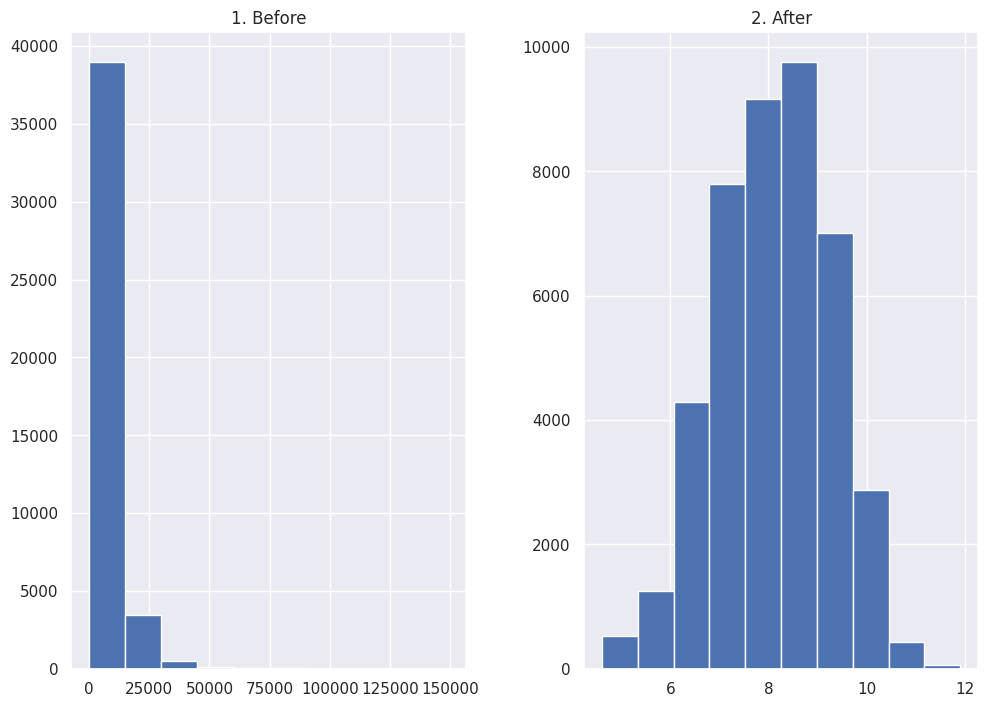

In [164]:
# =============================================================================
# MODEL BUILDING WITH IMPUTED DATA
# =============================================================================

cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()


#one hot encoding
# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True)


# =============================================================================
# MODEL BUILDING WITH IMPUTED DATA
# =============================================================================

# Separating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']


# Plotting the variable price
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

# Transforming price as a logarithmic value
y2 = np.log(y2)

# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)


# =============================================================================
# BASELINE MODEL FOR IMPUTED DATA
# =============================================================================

"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

# finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)

# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))

# finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))

print(base_root_mean_square_error_imputed)

In [167]:
# =============================================================================
# LINEAR REGRESSION WITH IMPUTED DATA
# =============================================================================

# Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)

# Model
model_lin2=lgr2.fit(X_train1,y_train1)

# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)

# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

# R squared value
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)

0.631004319135819
0.7062436906343218 0.7089252407645721


In [169]:




# =============================================================================
# RANDOM FOREST WITH IMPUTED DATA
# =============================================================================

# Model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='sqrt',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

# Model
model_rf2=rf2.fit(X_train1,y_train1)

# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)

# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

# R squared value
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)

##############################################################################



0.5116082612884851
0.8068931690294671 0.8200450498985703


In [170]:
# Final output

print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)


# =============================================================================
# END OF SCRIPT
# =============================================================================


Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7809367864240399
R squared value for test from Linear Regression=  0.7671383019862261
R squared value for train from Random Forest=  0.8527028864452602
R squared value for test from Random Forest=  0.8361926244764343
Base RMSE of model built from data where missing values were omitted= 1.127432049631379
RMSE value for test from Linear Regression=  0.5440507413004994
RMSE value for test from Random Forest=  0.4563069699192918



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7089252407645721
R squared value for test from Linear Regression=  0.7062436906343218
R squared value for train from Random Forest=  0.8200450498985703
R squared value for test from Random Forest=  0.8068931690294671
Base RMSE of model built from data where missing values were imputed= 1.1642298506077617
RMSE value for tes

(30208, 305) (12947, 305) (30208,) (12947,)
8.105363269984009
1.1642298506077617
0.631004319135819
0.7062436906343218 0.7089252407645721
0.5116082612884851
0.8068931690294671 0.8200450498985703
Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7809367864240399
R squared value for test from Linear Regression=  0.7671383019862261
R squared value for train from Random Forest=  0.8527028864452602
R squared value for test from Random Forest=  0.8361926244764343
Base RMSE of model built from data where missing values were omitted= 1.127432049631379
RMSE value for test from Linear Regression=  0.5440507413004994
RMSE value for test from Random Forest=  0.4563069699192918



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7089252407645721
R squared value for test from Linear Regression=  0.7062436906343218
R squared value for train from Random Forest

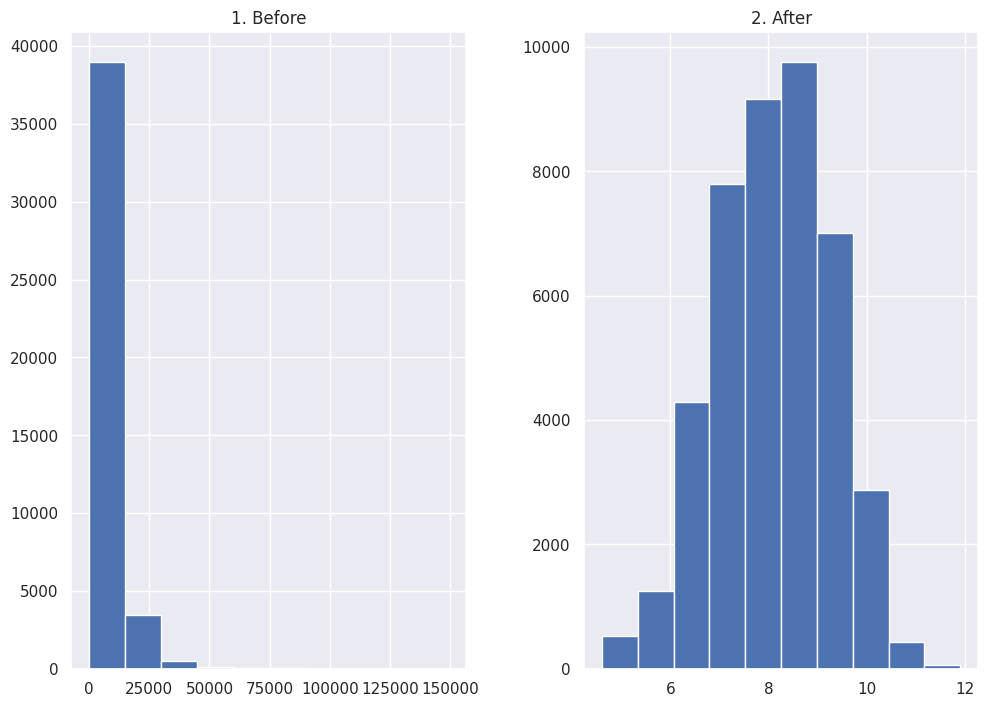